In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [13]:
# Load the aggregated metrics CSV
agg = pd.read_csv("classification_metrics.csv")

# Filter to RidgeWalker model
wave = agg[agg["model"] == "Wavelet"].set_index("group")

# Display full RidgeWalker metrics
display(wave[["tp", "fp", "fn", "tn", "precision", "recall", "f1", "accuracy"]])


,tp,fp,fn,tn,precision,recall,f1,accuracy
group,,,,,,,,
Variant - Two clearly separated peaks,0,0,0,10,1.00,1.0,1.00,1.00
Variant - Strong overlap between two peaks,1,0,4,0,1.00,0.2,0.33,0.20
"Variant - Four peaks: 2 overlap, 2 isolated",5,1,0,9,0.83,1.0,0.91,0.93
Variant - Cluster of 3 overlapping peaks,5,0,0,0,1.00,1.0,1.00,1.00
Variant - Close but not overlapping peaks,0,1,0,9,0.00,1.0,0.00,0.90
Variant - Intense + weak overlap,4,0,1,5,1.00,0.8,0.89,0.90
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10,0.00,0.0,0.00,0.50


In [14]:
confusion = wave[["tp", "fp", "fn", "tn"]]
print("Table X: Wavelet Confusion Matrix by Variant Group\n")
display(confusion)


Table X: Wavelet Confusion Matrix by Variant Group



,tp,fp,fn,tn
group,,,,
Variant - Two clearly separated peaks,0,0,0,10
Variant - Strong overlap between two peaks,1,0,4,0
"Variant - Four peaks: 2 overlap, 2 isolated",5,1,0,9
Variant - Cluster of 3 overlapping peaks,5,0,0,0
Variant - Close but not overlapping peaks,0,1,0,9
Variant - Intense + weak overlap,4,0,1,5
"Variant - Five peaks: 3 spaced, 2 overlapping",0,5,5,10


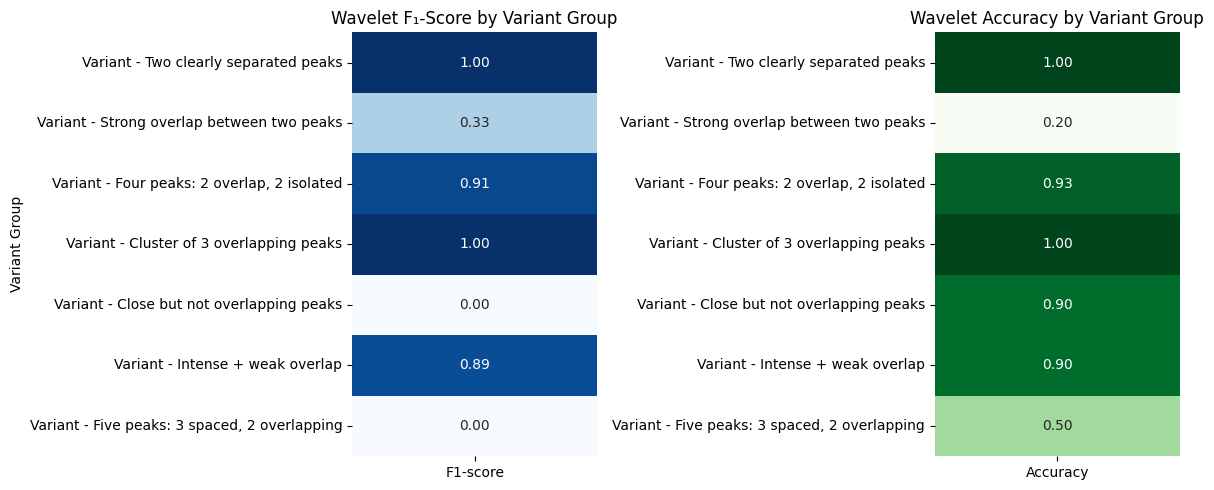

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# F1‐score heatmap
sns.heatmap(
    wave[["f1"]].rename(columns={"f1": "F1-score"}),
    annot=True, fmt=".2f", cmap="Blues", cbar=False, ax=ax1
)
ax1.set_title("Wavelet F₁-Score by Variant Group")
ax1.set_xlabel("")
ax1.set_ylabel("Variant Group")

# Accuracy heatmap
sns.heatmap(
    wave[["accuracy"]].rename(columns={"accuracy": "Accuracy"}),
    annot=True, fmt=".2f", cmap="Greens", cbar=False, ax=ax2
)
ax2.set_title("Wavelet Accuracy by Variant Group")
ax2.set_xlabel("")
ax2.set_ylabel("")

plt.tight_layout()
plt.show()


In [16]:
region = pd.read_csv("per_region_results.csv")
# Filter to Wavelet
region["group"] = region["group"].str.replace(r"^Variant -\s*", "", regex=True)
region["label"] = region["label"].str.replace(r"^Variant -\s*", "", regex=True)
wave_le_rt = region[(region["model"] == "Wavelet") & region["mean_loc_error_rt"].notna()]
wave_le_mz = region[(region["model"] == "Wavelet") & region["mean_loc_error_mz"].notna()]
region.head()

,group,label,model,region_idx,overlap_true,overlap_pred,count_error,mean_loc_error_mz,mean_loc_error_rt,confidence,bic_support,fusion_score
0,Two clearly separated peaks,Two clearly separated peaks 1,GMM,0,False,False,1,0.000770,0.009790,0.0,weak,NaN
1,Two clearly separated peaks,Two clearly separated peaks 1,GMM,1,False,False,1,0.000417,0.002987,0.0,weak,NaN
2,Two clearly separated peaks,Two clearly separated peaks 1,RidgeWalker,0,False,False,0,0.000801,0.042424,NaN,NaN,NaN
3,Two clearly separated peaks,Two clearly separated peaks 1,RidgeWalker,1,False,False,0,0.001802,0.008081,NaN,NaN,NaN
4,Two clearly separated peaks,Two clearly separated peaks 1,Wavelet,0,False,False,1,0.000801,0.008081,1.0,NaN,NaN


C:\Users\victo\AppData\Local\Temp\ipykernel_11940\1369620734.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python3

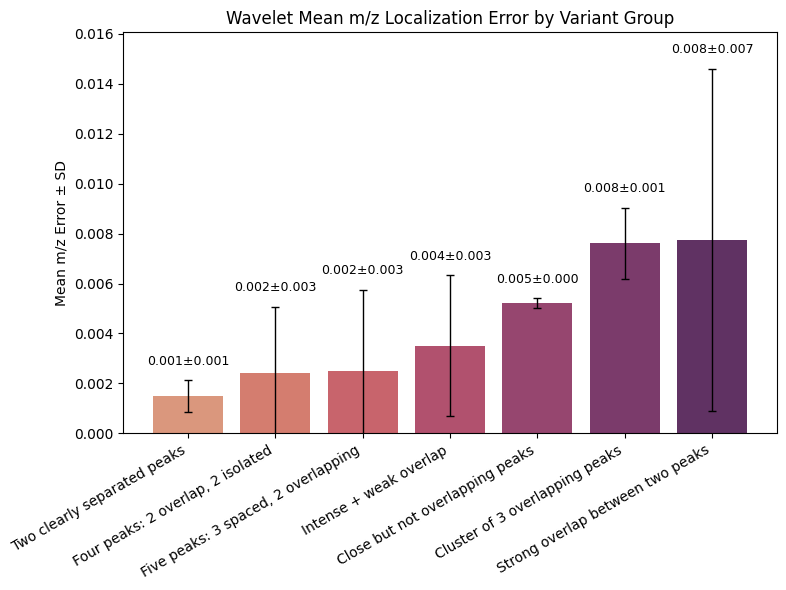

In [17]:
# Compute group-wise mean and std of m/z localization error
summary_le_mz = wave_le_mz.groupby("group")["mean_loc_error_mz"].agg(["mean", "std"]).sort_values("mean")
order_le_mz = summary_le_mz.index.tolist()

# Create barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=summary_le_mz.reset_index(),
    x="group",
    y="mean",
    order=order_le_mz,
    palette="flare"
)
# Add error bars and value labels
for i, (_, row) in enumerate(summary_le_mz.iterrows()):
    ax.errorbar(i, row["mean"], yerr=row["std"], color="k", capsize=3, lw=1)
    ax.text(i, row["mean"] + row["std"] + 0.0005, f"{row['mean']:.3f}±{row['std']:.3f}", ha="center", va="bottom", fontsize=9)

# Final plot formatting
ymax = (summary_le_mz["mean"] + summary_le_mz["std"]).max() * 1.10
ax.set_ylim(0, ymax)
ax.set_xlabel("")
plt.title("Wavelet Mean m/z Localization Error by Variant Group")
plt.ylabel("Mean m/z Error ± SD")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

C:\Users\victo\AppData\Local\Temp\ipykernel_11940\131520363.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python31

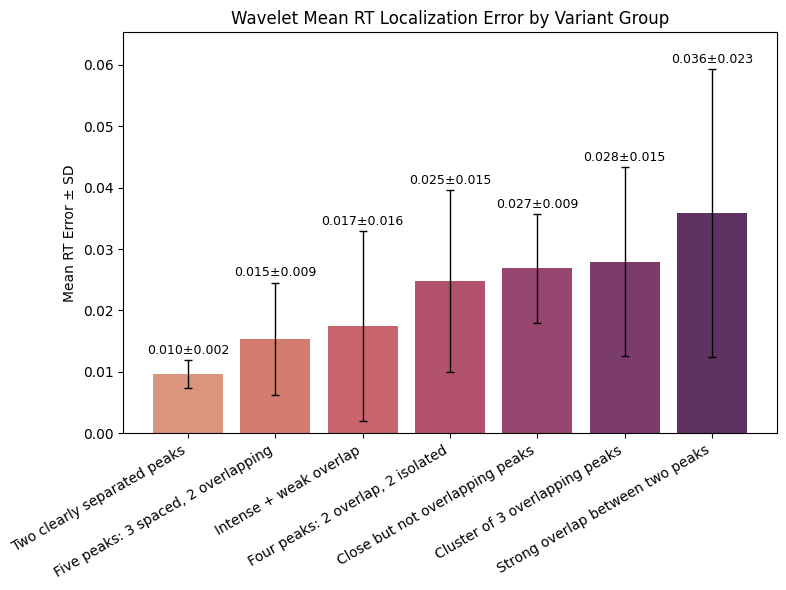

In [18]:
# Compute group-wise mean and std of m/z localization error
summary_le_rt = wave_le_rt.groupby("group")["mean_loc_error_rt"].agg(["mean", "std"]).sort_values("mean")
order_le_rt = summary_le_rt.index.tolist()

# Create barplot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    data=summary_le_rt.reset_index(),
    x="group",
    y="mean",
    order=order_le_rt,
    palette="flare"
)

# Add error bars and value labels
for i, (_, row) in enumerate(summary_le_rt.iterrows()):
    ax.errorbar(i, row["mean"], yerr=row["std"], color="k", capsize=3, lw=1)
    ax.text(i, row["mean"] + row["std"] + 0.0005, f"{row['mean']:.3f}±{row['std']:.3f}", ha="center", va="bottom", fontsize=9)

# Final plot formatting
ymax = (summary_le_rt["mean"] + summary_le_rt["std"]).max() * 1.10
ax.set_ylim(0, ymax)
ax.set_xlabel("")
plt.title("Wavelet Mean RT Localization Error by Variant Group")
plt.ylabel("Mean RT Error ± SD")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\victo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


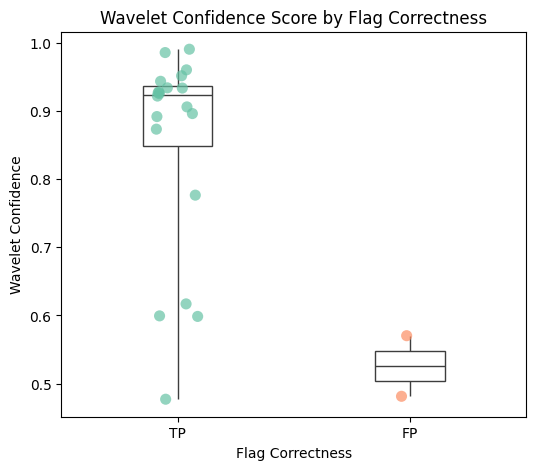

                                   group  \
41      Strong overlap between two peaks   
51     Four peaks: 2 overlap, 2 isolated   
60     Four peaks: 2 overlap, 2 isolated   
69     Four peaks: 2 overlap, 2 isolated   
71     Four peaks: 2 overlap, 2 isolated   
78     Four peaks: 2 overlap, 2 isolated   
87     Four peaks: 2 overlap, 2 isolated   
92        Cluster of 3 overlapping peaks   
95        Cluster of 3 overlapping peaks   
98        Cluster of 3 overlapping peaks   
101       Cluster of 3 overlapping peaks   
104       Cluster of 3 overlapping peaks   
109      Close but not overlapping peaks   
139               Intense + weak overlap   
151               Intense + weak overlap   
157               Intense + weak overlap   
163               Intense + weak overlap   
176  Five peaks: 3 spaced, 2 overlapping   
188  Five peaks: 3 spaced, 2 overlapping   
200  Five peaks: 3 spaced, 2 overlapping   
212  Five peaks: 3 spaced, 2 overlapping   
224  Five peaks: 3 spaced, 2 ove

In [19]:
# Prepare a correctness label: TP/FP based on overlap_pred and overlap_true
wave_corr = region[(region["model"] == "Wavelet") & (region["overlap_pred"])]
wave_corr = wave_corr[wave_corr["confidence"].notna()].copy()
wave_corr['correctness'] = np.where(
    (wave_corr['overlap_true']) & (wave_corr['overlap_pred']), "TP",
    np.where((~wave_corr['overlap_true']) & (wave_corr['overlap_pred']), "FP", "Other")
)
wave_corr = wave_corr[wave_corr['correctness'].isin(["TP", "FP"])]

plt.figure(figsize=(6, 5))
sns.stripplot(data=wave_corr, x="correctness", y="confidence", jitter=True, hue="correctness", palette="Set2", dodge=False, size=8, alpha=0.7)
sns.boxplot(data=wave_corr, x="correctness", y="confidence", whis=[0, 100], width=0.3, showcaps=False, boxprops={'facecolor':'None'}, showfliers=False)
plt.title("Wavelet Confidence Score by Flag Correctness")
plt.xlabel("Flag Correctness")
plt.ylabel("Wavelet Confidence")
plt.legend([],[], frameon=False)
plt.show()

print(wave_corr)

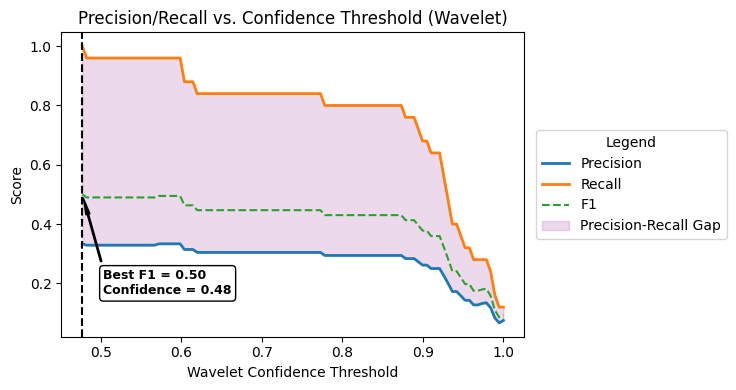

Best F1 = 0.50 at Confidence threshold 0.48


In [20]:
rw = region

# Filter to Wavelet entries with valid fusion scores
wave_all = rw[(rw["model"] == "Wavelet") & (rw["confidence"].notna())]

thresholds = np.linspace(wave_all['confidence'].min(), wave_all['confidence'].max(), 100)
precision, recall, f1 = [], [], []

# Evaluate precision, recall, and F1 at each threshold
for t in thresholds:
    pred = (wave_all['confidence'] >= t)
    tp = ((pred) & (wave_all['overlap_true'])).sum()
    fp = ((pred) & (~wave_all['overlap_true'])).sum()
    fn = ((~pred) & (wave_all['overlap_true'])).sum()
    prec = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    rec = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    precision.append(prec)
    recall.append(rec)
    f1.append(2 * prec * rec / (prec + rec) if prec + rec > 0 else np.nan)

# Convert results to arrays for indexing
precision = np.array(precision)
recall = np.array(recall)
f1 = np.array(f1)

# Identify best threshold based on max F1 score
best_idx = np.nanargmax(f1)
best_t = thresholds[best_idx]

# Plot precision, recall, and F1 as functions of threshold
plt.figure(figsize=(10, 4))
plt.plot(thresholds, precision, label='Precision', lw=2)
plt.plot(thresholds, recall, label='Recall', lw=2)
plt.plot(thresholds, f1, label='F1', linestyle="--", lw=1.5)

# Fill area between precision and recall curves
plt.fill_between(thresholds, precision, recall, color='purple', alpha=0.15, label='Precision-Recall Gap')

# Mark and annotate the best threshold
plt.axvline(x=best_t, color='k', linestyle='dashed')
plt.annotate(
    f"Best F1 = {f1[best_idx]:.2f}\nConfidence = {best_t:.2f}",
    xy=(best_t, f1[best_idx]),
    xytext=(best_t + (thresholds.max()-thresholds.min())*0.05, f1[best_idx] - 0.3),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=3),
    fontsize=9,
    ha='left', va='center', weight='bold', color='black',
    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1,)
)

# Final plot formatting
plt.xlabel("Wavelet Confidence Threshold")
plt.ylabel("Score")
plt.title("Precision/Recall vs. Confidence Threshold (Wavelet)")
plt.legend(
    loc='center left',
    bbox_to_anchor=(1.01, 0.5),
    frameon=True,
    title='Legend'
)
plt.tight_layout(rect=[0,0,0.75,1])
plt.show()

print(f"Best F1 = {f1[best_idx]:.2f} at Confidence threshold {best_t:.2f}")


,scenario_class,tp,fp,fn,tn,f1,accuracy
0,Asymmetric,4,0,1,5,0.89,0.90
1,Fully Separated,0,1,0,19,0.50,0.95
2,Near-Duplicates,0,5,5,10,0.00,0.50
3,Strongly Overlapping,1,0,4,0,0.33,0.20
4,Weakly Overlapping,10,1,0,9,0.96,0.97


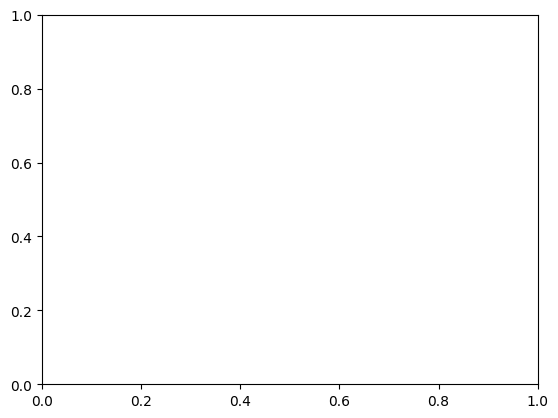

In [21]:
# Strip prefix from group name
agg["base_group"] = agg["group"].str.replace(r"^Variant -\s*", "", regex=True)

# Map base group to scenario class
scenario_map = {
    "Two clearly separated peaks":        "Fully Separated",
    "Close but not overlapping peaks":     "Fully Separated",
    "Cluster of 3 overlapping peaks":      "Weakly Overlapping",
    "Four peaks: 2 overlap, 2 isolated":  "Weakly Overlapping",
    "Strong overlap between two peaks":    "Strongly Overlapping",
    "Intense + weak overlap":             "Asymmetric",
    "Five peaks: 3 spaced, 2 overlapping": "Near-Duplicates"
}
agg["scenario_class"] = agg["base_group"].map(scenario_map)

# Filter for Wavelet model
plt.legend([],[], frameon=False)
wave_agg = agg[agg["model"] == "Wavelet"]

# Aggregate metrics by scenario
tbl = (
    wave_agg
    .groupby("scenario_class")
    .agg({
        "tp":       "sum",
        "fp":       "sum",
        "fn":       "sum",
        "tn":       "sum",
        "f1":       "mean",
        "accuracy": "mean"
    })
    .reset_index()
)

# Round metric values
tbl["f1"] = tbl["f1"].round(2)
tbl["accuracy"] = tbl["accuracy"].round(2)
# Show table
display(tbl)

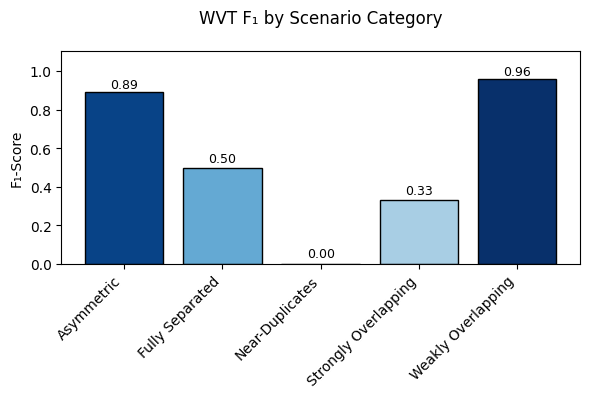

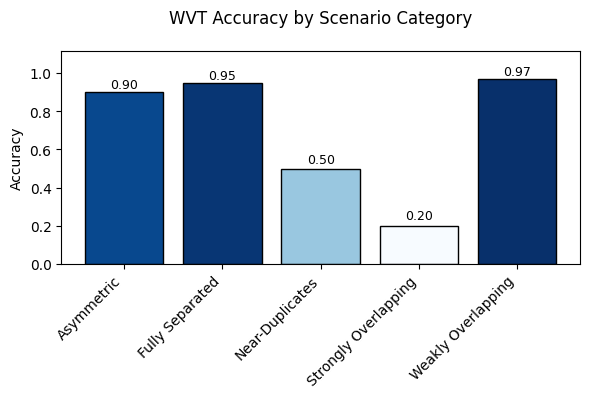

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Prepare values and colormap
vals = tbl["f1"].values
norm = mpl.colors.Normalize(vmin=vals.min(), vmax=vals.max())
cmap = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    tbl["scenario_class"],
    vals,
    color=cmap(norm(vals)),
    edgecolor="black"
)

# Extend y‐axis to make room for annotations
ymax = vals.max() * 1.15
plt.ylim(0, ymax)

plt.title("WVT F₁ by Scenario Category", pad=20)
plt.ylabel("F₁-Score")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

# Annotate bar values
for bar, h in zip(bars, vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

# Color‐mapped, annotated GMM Accuracy by Scenario Category

acc_vals = tbl["accuracy"].values
norm_acc = mpl.colors.Normalize(vmin=acc_vals.min(), vmax=acc_vals.max())
cmap_acc = mpl.cm.Blues

plt.figure(figsize=(6, 4))
bars = plt.bar(
    tbl["scenario_class"],
    acc_vals,
    color=cmap_acc(norm_acc(acc_vals)),
    edgecolor="black"
)

ymax_acc = acc_vals.max() * 1.15
plt.ylim(0, ymax_acc)

plt.title("WVT Accuracy by Scenario Category", pad=20)
plt.ylabel("Accuracy")
plt.xlabel("")
plt.xticks(rotation=45, ha="right")

for bar, h in zip(bars, acc_vals):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        h + (ymax_acc - h) * 0.02,
        f"{h:.2f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()